# [aftershoq]: A guide to creating quantum cascade structures



Author: Martin Franckie, Sept. 2018

This guide will show you how to:

- Create materials and structures
- Load structures from the library
- Generate random structures, in N-dimensions and along the Hilbert curve

First make sure your pythonpath directs to "aftershoq/" and "aftershoq/hilbert_curve/", e.g. by setting it in ~/.bash_profile/: 

export PYTHONPATH="path-to/aftershoq/:path-to/aftershoq/hilbert_curve/:$PYTHONPATH"



Creating materials:

In [2]:
from aftershoq.materials import *
import aftershoq.structure.matpar as mp

well = InGaAs(x = 0.68)
barr = AlInAs(x = 0.665)

print ( "CBO = " + str(barr.params[mp.Ec] - well.params[mp.Ec]) )

print( str(well) + " parameters:\n")
for val in mp.valdict:
        print(val + " = " + str(well.params[mp.valdict[val]]))
        
print( "\n" + str(barr) + " parameters (x=" + str(barr.x) + "):\n")
for val in mp.valdict:
        print(val + " = " + str(barr.params[mp.valdict[val]]))


CBO = 0.63708515
GaInAs parameters:

meff = 0.051899839999999996
CBO = -0.298496
Eg = 1.0625648
Ep = 22.162048
Alloy pot. = 0.1940992
ELO = 0.03466880000000001
eps(0) = 13.749792
eps(inf) = 11.3412
deform. pot. = -7.069135999999999
long. sound vel. = 4442.0
mass dens = 5433.16
mol volume = 0.0485076
lattice constant = 5.782696

AlInAs parameters (x=0.665):

meff = 0.097544025
CBO = 0.33858915
Eg = 2.0445875000000004
Ep = 22.90404775
Alloy pot. = 0.41926255
ELO = 0.043233
eps(0) = 11.7484
eps(inf) = 9.47375
deform. pot. = -1.3899149999999998
long. sound vel. = 1283.05
mass dens = 1902.7999999999997
mol volume = 0.018625999999999997
lattice constant = 2.0295305


Reproducing plot of Keita Ohtani <i>et al</i>., Appl. Phys. Lett <b>103</b>, 041103 (2013)
(https://doi.org/10.1063/1.4816352)

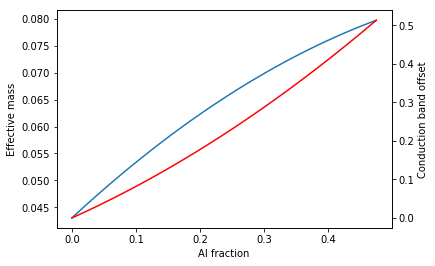

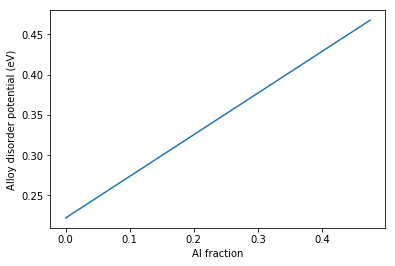

In [4]:
from matplotlib import pyplot as pl
from matplotlib.pyplot import axis 

alingaas = AlInGaAs(1)
ingaas = InGaAs()
inalas = AlInAs()

N = 100
    
ec = []
va = []
m = []
z = []
x = []
for i in range (0, N):
    z.append( float(i)/float(N) )
    x.append( z[i]*0.48 )
    alingaas.updateAlloy(z[i])
    ec.append(alingaas.params[mp.Ec]-ingaas.params[mp.Ec])
    m.append(alingaas.params[mp.meff])
    va.append(alingaas.params[mp.Valloy])
    
# reproducing plot from Ohtani APL 2013:
pl.plot(x,m)

pl.xlabel("Al fraction")
pl.ylabel("Effective mass")
ax1 = pl.gca()
ax2 = ax1.twinx()
ax2.plot(x,ec,'r')
pl.ylabel("Conduction band offset")

pl.figure(2)
pl.plot(x,va)
pl.xlabel("Al fraction")
pl.ylabel("Alloy disorder potential (eV)")
pl.show()



Creating structures:

In [5]:
from aftershoq.structure import Structure
from aftershoq.qcls import *

s = Structure()

s.setIFR(0.1, 6.0)

s.addLayerWM(2.0, well)
s.addLayerWM(1.1, barr)

s.addDoping(zi = 0.9, zf = 1.1, density = 2e17, layerindex = 0)

print (s)
print ("Doping layers: " + str(s.dopings) + "\n")

s2 = EV2416()

print(s2)

s2.setIFR(0.2, 6)

print (s2)

[width, Material, eta, lambda] (id=0)
[2.0, GaInAs, 0.1, 6.0]
[1.1, AlInAs, 0.1, 6.0]

Doping layers: [[0.9, 1.1, 2e+17]]

[width, Material, eta, lambda] (id=1)
[3.1, AlGaAs, 0.1, 10]
[8.5, GaAs, 0.1, 10]
[1.8, AlGaAs, 0.1, 10]
[8.7, GaAs, 0.1, 10]
[3.0, GaAs, 0.1, 10]
[6.0, GaAs, 0.1, 10]

[width, Material, eta, lambda] (id=1)
[3.1, AlGaAs, 0.2, 6]
[8.5, GaAs, 0.2, 6]
[1.8, AlGaAs, 0.2, 6]
[8.7, GaAs, 0.2, 6]
[3.0, GaAs, 0.2, 6]
[6.0, GaAs, 0.2, 6]



Generating random structures along a Hilbert curve:

In [6]:
from aftershoq.structure import Sgenerator

# Allows change of x in the barriers by ±10% (independently)
dx = [0.1, 0.0, 0.1, 0.0, 0.0, 0.0]

# Allows change of layer widths by ±1 nm
dw = [1.,1.,1.,1.,1.,1.]

# Allows change of doping start and end positions by ±0.5 nm
# and density by ±1e17 cm^-3
ddop = [0.5, 0.5 , 1e17]

sg = Sgenerator( s2, dw, dx, ddop )
    
# generate N random structures with the distribution in parameters defined above:
N = 5
sg.genRanStructs(N)

for ss in sg.structures:
    print (ss)
    print ("doping: " + str(ss.dopings[0]) + "\n")
    
# generate N random structures, along the Hilbert curve with order p
sg.structures = []
p = 5
coords = sg.genRanHilbertStructs(N, p)

for ss in sg.structures:
    print (ss)
    print ("doping: " + str(ss.dopings[0]) + "\n")

[width, Material, eta, lambda] (id=2)
[3.067611616288942, AlGaAs, 0.2, 6]
[8.689414162679158, GaAs, 0.2, 6]
[2.084538114076519, AlGaAs, 0.2, 6]
[9.24122038936771, GaAs, 0.2, 6]
[2.398041872295471, GaAs, 0.2, 6]
[6.786490152518124, GaAs, 0.2, 6]

doping: [23.082784282412327, 25.4808261547078, 2.6122468199343072e+17]

[width, Material, eta, lambda] (id=3)
[2.9666232474816407, AlGaAs, 0.2, 6]
[7.855326992843628, GaAs, 0.2, 6]
[1.3688916966352802, AlGaAs, 0.2, 6]
[8.996330173816904, GaAs, 0.2, 6]
[2.621443427971977, GaAs, 0.2, 6]
[6.941427100087701, GaAs, 0.2, 6]

doping: [21.187172110777453, 23.80861553874943, 8.710632679745909e+16]

[width, Material, eta, lambda] (id=4)
[3.6279178383267556, AlGaAs, 0.2, 6]
[8.963523211240295, GaAs, 0.2, 6]
[2.434075096806669, AlGaAs, 0.2, 6]
[9.091706469463352, GaAs, 0.2, 6]
[3.7125928947948568, GaAs, 0.2, 6]
[6.842577873525975, GaAs, 0.2, 6]

doping: [24.117222615837072, 27.829815510631928, 1.58627659403064e+17]

[width, Material, eta, lambda] (id=5)
[2